In [99]:
packageVersion('IRdisplay')
packageVersion('IRkernel')
packageVersion('repr')

[1] ‘0.4.9000’

[1] ‘0.6’

[1] ‘0.9’

In [100]:
clean_column <- function(col) {
    col <- sapply(col, function(x) toString(x))
    col <- sapply(col, function(x) tolower(x))
    col <- sapply(col, function(x) gsub("-", "", x))
    col <- sapply(col, function(x) gsub(" ", "", x))
    return(col)
}

In [144]:
MAKES_WANTED = c("toyota", "honda", "chevrolet", "mazda", "nissan", "subaru", "hyundai")
MODELS_WANTED = c("rav4", "crv", "accord", "camry", "hrv", "4runner")

# Parse and Clean Data

In [153]:
raw_df = rbind(
    read.csv("data/kijiji_cars.csv"), 
    read.csv("data/ottawahonda_cars.csv"),
    read.csv("data/tonygrahamtoyota_cars.csv"),
    read.csv("data/jimtubman_cars.csv")
)

raw_df$make <- clean_column(raw_df$make)
raw_df$model <- clean_column(raw_df$model)
    
raw_df <- raw_df[raw_df$make %in% MAKES_WANTED, ]
    
raw_df$price <- lapply(raw_df$price, function(x) gsub("\\$", "", x))
raw_df$price <- lapply(raw_df$price, function(x) gsub("\\,", "", x))
raw_df$price <- as.numeric(as.character(raw_df$price))
    
raw_df$kilometers <- as.character(raw_df$kilometers)
raw_df$kilometers <- lapply(raw_df$kilometers, function(x) gsub("km", "", x))
raw_df$kilometers <- lapply(raw_df$kilometers, function(x) gsub(",", "", x))
raw_df$kilometers <- as.numeric(raw_df$kilometers)
    
raw_df$age <- 2016 - raw_df$year

Warning message:
In `[<-.factor`(`*tmp*`, ri, value = c(173364, 86548, 41900, 23006, : invalid factor level, NA generatedWarning message:
In `[<-.factor`(`*tmp*`, ri, value = c(5, 5, 5, 5, 6, 5, 5, 10, : invalid factor level, NA generatedWarning message:
In `[<-.factor`(`*tmp*`, ri, value = c(30279L, 53883L, 34243L, 27971L, : invalid factor level, NA generatedWarning message:
In eval(expr, envir, enclos): NAs introduced by coercion

In [164]:
raw_df <- raw_df[, !(names(raw_df) %in% c("description"))]

In [165]:
nrow(raw_df)

[1] 537

In [166]:
colnames(raw_df)

[1] "domain"      "date_listed" "url"         "make"        "title"      
 [6] "year"        "kilometers"  "model"       "price"       "age"

In [167]:
sapply(raw_df, class)

domain date_listed         url        make       title        year 
   "factor"    "factor"    "factor" "character"    "factor"   "integer" 
 kilometers       model       price         age 
  "numeric" "character"   "numeric"   "numeric"

## Join with Fuel and Maintenance Data

In [168]:
eff <- read.csv("data/nrcan_fuel_ratings.csv")
nrow(eff)

[1] 30732

In [169]:
eff <- eff[!duplicated(eff$title), ]
eff$make <- clean_column(eff$make)
eff$model <- clean_column(eff$model)
nrow(eff)
colnames(eff)

[1] 734

[1] "engine_size_litres"       "domain"                  
 [3] "cylinders"                "title"                   
 [5] "transmission"             "year"                    
 [7] "make"                     "ranking_overall"         
 [9] "lphkm_city"               "ranking_class"           
[11] "lphkm_hwy"                "url"                     
[13] "model_class"              "fuel"                    
[15] "estimated_fuel_cost_year" "model"

In [170]:
library(dplyr)
df <- dplyr::left_join(
    raw_df, 
    eff, 
    by=c("make" = "make", "model" = "model", "year" = "year")
)  
nrow(df)
colnames(df)

[1] 537

[1] "domain.x"                 "date_listed"             
 [3] "url.x"                    "make"                    
 [5] "title.x"                  "year"                    
 [7] "kilometers"               "model"                   
 [9] "price"                    "age"                     
[11] "engine_size_litres"       "domain.y"                
[13] "cylinders"                "title.y"                 
[15] "transmission"             "ranking_overall"         
[17] "lphkm_city"               "ranking_class"           
[19] "lphkm_hwy"                "url.y"                   
[21] "model_class"              "fuel"                    
[23] "estimated_fuel_cost_year"

In [160]:
maintenance <- read.csv("data/maintenance_costs_manual_collection.csv")
maintenance$make <- clean_column(maintenance$make)
maintenance$model <- clean_column(maintenance$model)
nrow(maintenance)
colnames(maintenance)

[1] 14

[1] "make"                    "model"                  
 [3] "year"                    "five_year_maintenance"  
 [5] "eight_year_maintenance"  "five_year_depreciation" 
 [7] "eight_year_depreciation" "five_year_fuel"         
 [9] "msrp_lower"              "msrp_upper"             
[11] "predicted_reliability"

In [161]:
df <- left_join(
    df, 
    maintenance, 
    by=c("make" = "make", "model" = "model", "year" = "year")
)  
nrow(df)
colnames(df)

[1] 537

[1] "domain.x"                 "description"             
 [3] "date_listed"              "url.x"                   
 [5] "make"                     "title.x"                 
 [7] "year"                     "kilometers"              
 [9] "model"                    "price"                   
[11] "age"                      "engine_size_litres"      
[13] "domain.y"                 "cylinders"               
[15] "title.y"                  "transmission"            
[17] "ranking_overall"          "lphkm_city"              
[19] "ranking_class"            "lphkm_hwy"               
[21] "url.y"                    "model_class"             
[23] "fuel"                     "estimated_fuel_cost_year"
[25] "five_year_maintenance"    "eight_year_maintenance"  
[27] "five_year_depreciation"   "eight_year_depreciation" 
[29] "five_year_fuel"           "msrp_lower"              
[31] "msrp_upper"               "predicted_reliability"

In [162]:
summary(df$kilometers)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
      1   68450  128000  138500  198800  420000     197 

# Overview

Warning message:
: Removed 163 rows containing missing values (geom_point).

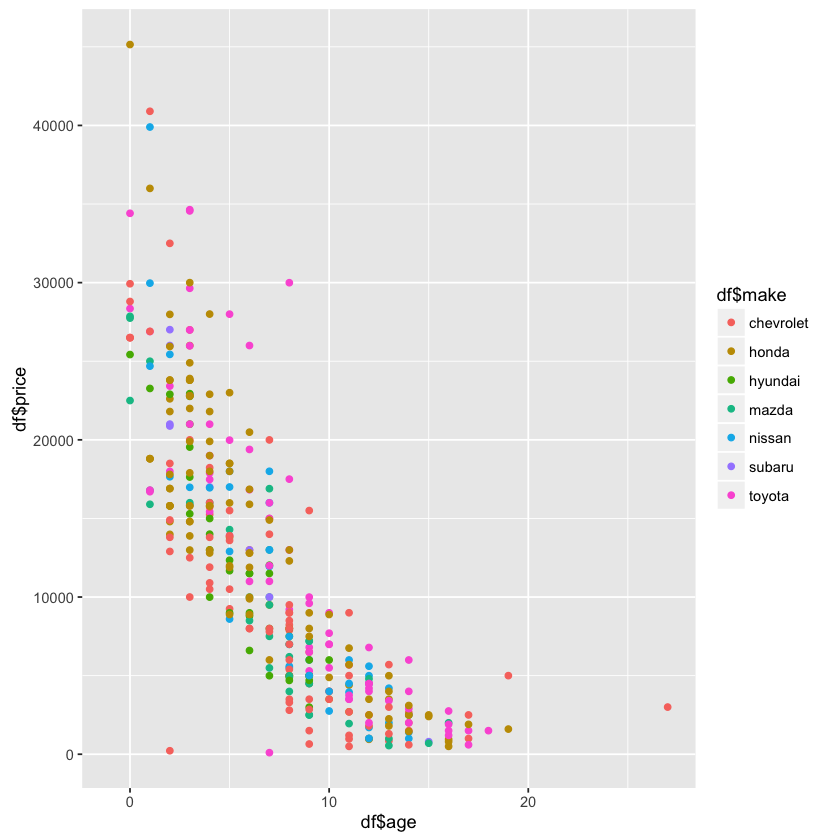

In [163]:
library(ggplot2)
ggplot(df) + geom_point(aes(x=df$age, y=df$price, colour=df$make))

# Toyota

Warning message:
: Removed 152 rows containing missing values (geom_label).

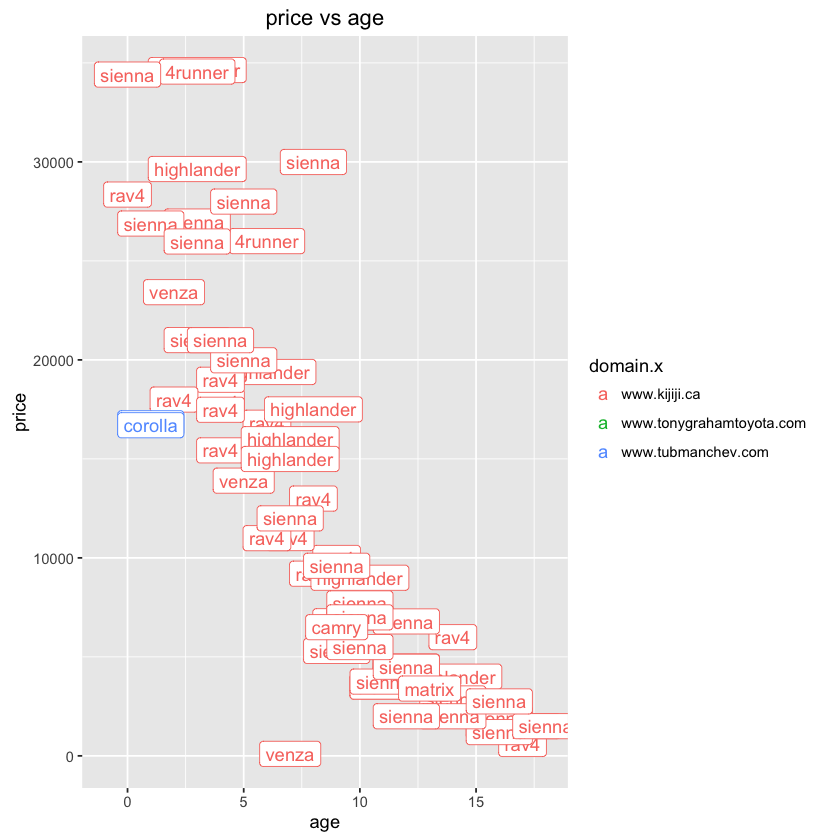

In [135]:
library(ggplot2)
plot_price_vs_age <- function(dataframe) {
    p <- ggplot(dataframe, aes(age, price, label=model, color=domain.x))
    p + geom_label() + ggtitle("price vs age")  
}
tmp <- df[df$make == "toyota", ]
plot_price_vs_age(tmp)

In [136]:
colnames(df)


[1] "domain.x"                 "description"             
 [3] "date_listed"              "url.x"                   
 [5] "make"                     "title.x"                 
 [7] "year"                     "kilometers"              
 [9] "model"                    "price"                   
[11] "age"                      "engine_size_litres"      
[13] "domain.y"                 "cylinders"               
[15] "title.y"                  "transmission"            
[17] "ranking_overall"          "lphkm_city"              
[19] "ranking_class"            "lphkm_hwy"               
[21] "url.y"                    "model_class"             
[23] "fuel"                     "estimated_fuel_cost_year"
[25] "five_year_maintenance"    "eight_year_maintenance"  
[27] "five_year_depreciation"   "eight_year_depreciation" 
[29] "five_year_fuel"           "msrp_lower"              
[31] "msrp_upper"               "predicted_reliability"

Warning message:
: Removed 152 rows containing missing values (geom_label).

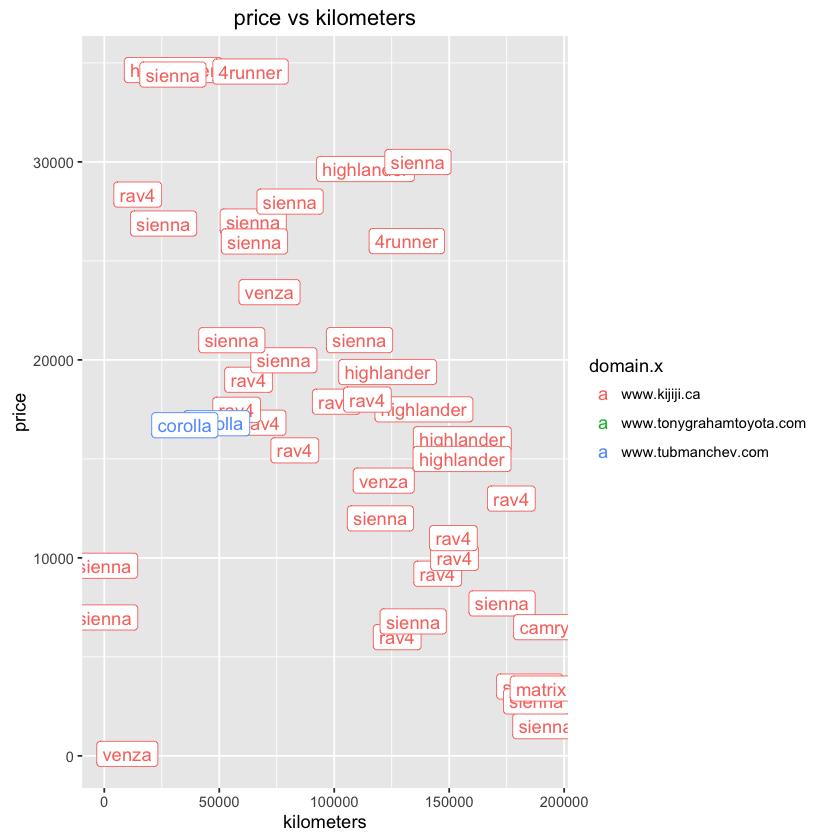

In [138]:
plot_price_vs_kilometers <- function(dataframe) {
    dataframe <- dataframe[dataframe$kilometers < 200000, ]
    p <- ggplot(dataframe, aes(kilometers, price, label=model, color=domain.x))
    p <- p + geom_label() + ggtitle("price vs kilometers")
    p
}
tmp <- df[df$make == "toyota", ]
plot_price_vs_kilometers(tmp)

# Honda

Warning message:
: Removed 3 rows containing missing values (geom_label).

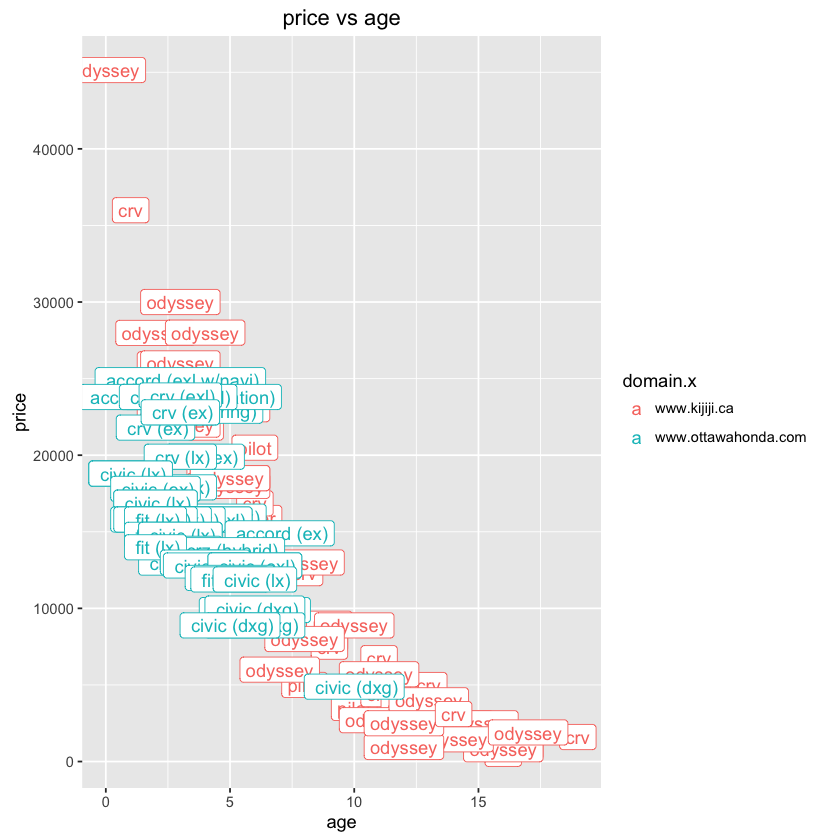

In [139]:
tmp <- df[df$make == "honda", ]
plot_price_vs_age(tmp)

Warning message:
: Removed 51 rows containing missing values (geom_label).

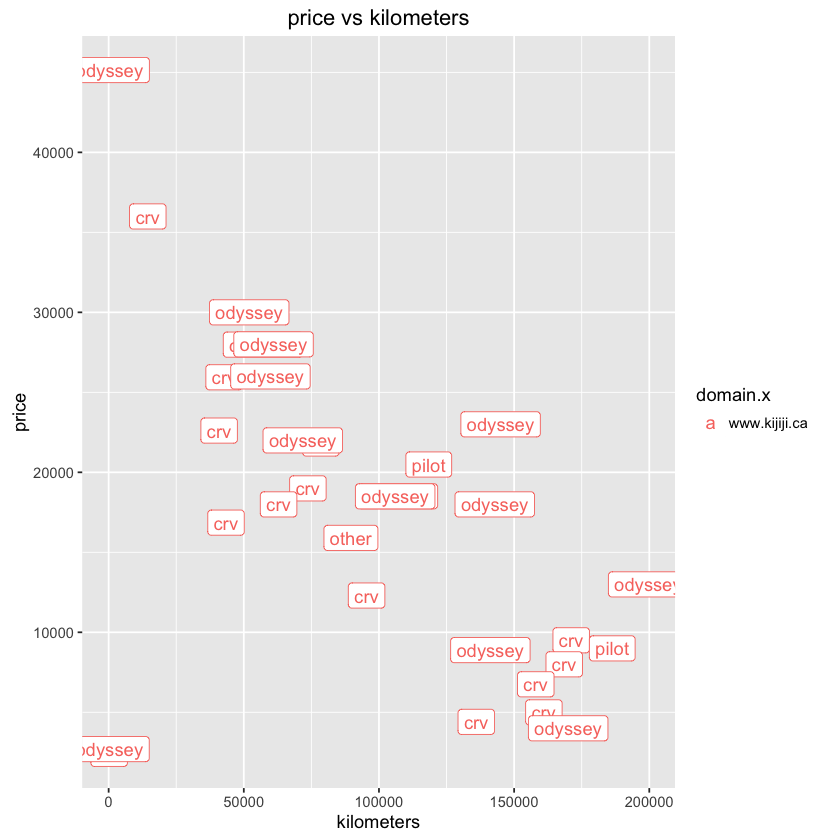

In [140]:
tmp <- df[df$make == "honda", ]
plot_price_vs_kilometers(tmp)

In [141]:
write.csv(df, file="data/output.csv")